# House Price Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from model_utils import report, cv_scores

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

## Data Preprecessing

### Importing the dataset

In [2]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

### Splitting the dataset into the Training set and Test set 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [4]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)

In [5]:
X_train_sc = X_train_sc.reshape(X_train_sc.shape[0], 1, X_train_sc.shape[1])
X_test_sc = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])

## Training the GRU model

In [6]:
seed_value = 6155814

import random
random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

np.random.seed(seed_value)

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

In [7]:
def create_rnn(optimizer='adam'):
  n_features = 27

  # Initialising the RNN
  rnn = keras.models.Sequential()

  # GRU
  rnn.add(keras.layers.GRU(units=128, input_shape=(1, n_features), return_sequences=True))

  # GRU
  rnn.add(keras.layers.GRU(units=32, return_sequences=True))

  # Full Connection
  rnn.add(keras.layers.Dense(units=64, activation='relu'))

  # Output Layer
  rnn.add(keras.layers.Dense(units=1, activation='linear'))

  rnn.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

  return rnn

model = KerasRegressor(build_fn=create_rnn, epochs=200, batch_size=10)
model.fit(X_train_sc, y_train_sc, verbose = 2)

Epoch 1/200
87/87 - 4s - loss: 0.3844 - mae: 0.4658
Epoch 2/200
87/87 - 0s - loss: 0.1467 - mae: 0.3015
Epoch 3/200
87/87 - 0s - loss: 0.1193 - mae: 0.2683
Epoch 4/200
87/87 - 0s - loss: 0.1078 - mae: 0.2555
Epoch 5/200
87/87 - 0s - loss: 0.0945 - mae: 0.2395
Epoch 6/200
87/87 - 0s - loss: 0.0862 - mae: 0.2278
Epoch 7/200
87/87 - 0s - loss: 0.0830 - mae: 0.2203
Epoch 8/200
87/87 - 0s - loss: 0.0794 - mae: 0.2185
Epoch 9/200
87/87 - 0s - loss: 0.0691 - mae: 0.2037
Epoch 10/200
87/87 - 0s - loss: 0.0657 - mae: 0.1988
Epoch 11/200
87/87 - 0s - loss: 0.0618 - mae: 0.1939
Epoch 12/200
87/87 - 0s - loss: 0.0626 - mae: 0.1937
Epoch 13/200
87/87 - 0s - loss: 0.0557 - mae: 0.1814
Epoch 14/200
87/87 - 0s - loss: 0.0537 - mae: 0.1812
Epoch 15/200
87/87 - 0s - loss: 0.0494 - mae: 0.1737
Epoch 16/200
87/87 - 0s - loss: 0.0464 - mae: 0.1688
Epoch 17/200
87/87 - 0s - loss: 0.0467 - mae: 0.1654
Epoch 18/200
87/87 - 0s - loss: 0.0421 - mae: 0.1595
Epoch 19/200
87/87 - 0s - loss: 0.0403 - mae: 0.1569
Ep

### Cross Validation

Epoch 1/200
70/70 [==============================] - 4s 4ms/step - loss: 0.5222 - mae: 0.5743
Epoch 2/200
70/70 [==============================] - 0s 4ms/step - loss: 0.1529 - mae: 0.3035
Epoch 3/200
70/70 [==============================] - 0s 4ms/step - loss: 0.1215 - mae: 0.2780
Epoch 4/200
70/70 [==============================] - 0s 4ms/step - loss: 0.1044 - mae: 0.2498
Epoch 5/200
70/70 [==============================] - 0s 4ms/step - loss: 0.0885 - mae: 0.2311
Epoch 6/200
70/70 [==============================] - 0s 4ms/step - loss: 0.0915 - mae: 0.2387
Epoch 7/200
70/70 [==============================] - 0s 4ms/step - loss: 0.0885 - mae: 0.2315
Epoch 8/200
70/70 [==============================] - 0s 4ms/step - loss: 0.0747 - mae: 0.2127
Epoch 9/200
70/70 [==============================] - 0s 4ms/step - loss: 0.0621 - mae: 0.1942
Epoch 10/200
70/70 [==============================] - 0s 4ms/step - loss: 0.0652 - mae: 0.1965
Epoch 11/200
70/70 [==============================] - 0s 4m

,Scores
Split 1,0.91264
Split 2,0.88995
Split 3,0.88064
Split 4,0.91026
Split 5,0.93533
CV Score,0.90576


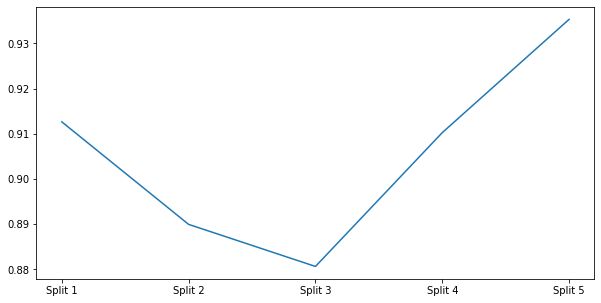

In [8]:
cv_scores(model, X_train_sc, y_train_sc, cv=5)

### Testing data

,Value
Metric,
R2 Score,0.942044
MAE,36951.294868
RMSE,50397.353193


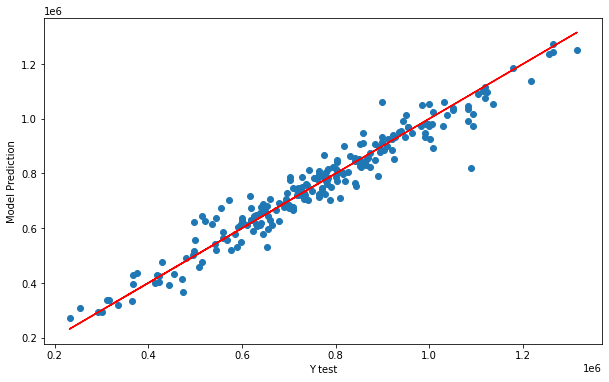

In [9]:
y_pred = model.predict(X_test_sc)
report(y_test, sc_y.inverse_transform(y_pred))

In [10]:
model.model.save('gru.h5')